## Research Questions – Part4 – Sign Life Cycle
1.	Import libraries & set directory paths
2.	Import Portal data, check dimensions and data types
    - Import: stone_signs_portal_v3.2_saleslets_lead_perday - 26,920.csv
3.	Qu.11) How many signs are there in a sign life-cycle?
    -	Calculate the number of signs per cycle based on postcode, address_1, agent_name & sign_category.
    -	Exclude records where sign is still up AND sign_count <3, representing incomplete cycles still below target.
    -	Display as histogram.
    -	Categorise cycle_count for pie chart viewing.
4.	Export to: stone_signs_portal_v4.0_saleslets_lifecycle_target.csv


### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from datetime import date
import datetime
import matplotlib.patches as mpatches

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## Import Portal Data

In [4]:
df_saleslet = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v3.2_saleslets_lead_perday - 26,920.csv'))
df_saleslet.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,is_up,month_no,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,1,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,1,11,Nov,2020,Sales,Standard 48hr,2020-11-26,2020-11-28,68,90
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,0,9,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19,78,66
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,0,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,0,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122


### check dimensions & data types

In [5]:
df_saleslet.shape

(26920, 45)

In [6]:
df_saleslet.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                  float64
sign_type                    object
address_1                    object
address_2                    object
address_3                    object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

## Qu.11) How many signs in a sign life-cycle? 
        i.e., how many instructions per property?

### create column for cycle_count.
Request_id is used by the Portal to link sign requests belonging to the same cycle.  However where users have created a new sign (unaware of the existing one), a new request_id is assigned.  This means that request_id is not an accurate indicatiom of the number of signs per life cycle. 

As a work around, Sign Life Cycle will be determined by postcode, address1, agent & sign category.

#### According to Stone Signs, an expected and worthwhile life cycle consists of at least 3 signs.
The 'is-up' flag indicates that the sign is at location.  If the sign is still up and the number of signs is less than three (i.e. life cycle is still in progress and not met target) these will be excluded from the final visualisation.

### set postcode to uppercase and address_1 to titlecase and remove commas.
...to ensure all possible matches when grouping signs into life cyles

In [7]:
df_saleslet['postcode'] = df_saleslet['postcode'].str.upper()
df_saleslet['address_1'] = df_saleslet['address_1'].str.title()

In [8]:
df_saleslet['address_1'] = df_saleslet['address_1'].str.replace(',','')
df_saleslet[['postcode','address_1']].head()

,postcode,address_1
0,BN1 1EL,24 Old Steine
1,BN1 1JG,1 Daisy Court
2,BN1 1JG,1 Daisy Court
3,BN1 1UB,11 Marlborough Place
4,BN1 1UB,11 Marlborough Place


### to define life cycle count, group by:
postcode, address_1, agent_name & sign_category

In [9]:
df_saleslet['cycle_count'] = df_saleslet.groupby(['postcode','address_1','agent_name','sign_category'])['quantity'].transform(np.size)
df_saleslet.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,month_no,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26,1
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,11,Nov,2020,Sales,Standard 48hr,2020-11-26,2020-11-28,68,90,2
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,9,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19,78,66,2
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26,2
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122,2


### export to CSV for review

In [10]:
df_saleslet.shape

(26920, 46)

In [11]:
df_saleslet.to_csv(os.path.join(dataset,'stone_signs_portal_v3.3_saleslets_lifecycle - 26,920.csv'), index=False)

### exclude records where sign is still up AND cycle_count<3
These records represent an incomplete cycle that has not met minimum target.  Signs still up and >=3 are still incomplete but have met target.

In [12]:
df_lifecycle = df_saleslet.loc[(df_saleslet['is_up']==0) | ((df_saleslet['is_up']==1) & (df_saleslet['cycle_count']>=3))]
df_lifecycle.shape

(24209, 46)

### reset_index

In [14]:
df_lifecycle = df_lifecycle.reset_index(drop=True)
df_lifecycle.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,month_no,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count
0,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,9,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19,78,66,2
1,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26,2
2,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122,2
3,9210,2020-10-13 13:30:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26,2
4,9210,2021-03-09 11:05:00,2021-03-11 14:06:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122,2


### review descriptive statistics for cycle_count - both Sales and Letting

In [15]:
df_lifecycle['cycle_count'].describe()

count    24209.000000
mean         3.469288
std          1.912682
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         19.000000
Name: cycle_count, dtype: float64

In [16]:
df_lifecycle['cycle_count'].mode()

0    3
dtype: int64

### compare cycle_count for Sales and letting
create sales and letting subsets

In [17]:
df_sales = df_lifecycle.loc[df_lifecycle['sign_category']=='Sales']
df_sales.shape

(19156, 46)

In [18]:
df_lets = df_lifecycle.loc[df_lifecycle['sign_category']=='Letting']
df_lets.shape

(5053, 46)

### check record total 24,209

In [19]:
19156 + 5053

24209

### sales cycle count descriptive statistics

In [20]:
df_sales['cycle_count'].describe()

count    19156.000000
mean         3.542441
std          2.003501
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         19.000000
Name: cycle_count, dtype: float64

In [21]:
df_sales['cycle_count'].mode()

0    3
dtype: int64

### letting cycle count descriptive statistics

In [22]:
df_lets['cycle_count'].describe()

count    5053.000000
mean        3.191965
std         1.487730
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: cycle_count, dtype: float64

In [23]:
df_lets['cycle_count'].mode()

0    3
dtype: int64

### review value_counts for each group

In [24]:
df_sales['cycle_count'].value_counts()

3     5280
2     5087
4     3404
5     1910
1     1176
6     1002
7      490
8      296
9      189
10     120
13      39
12      36
11      33
16      32
14      28
19      19
15      15
Name: cycle_count, dtype: int64

In [25]:
df_lets['cycle_count'].value_counts()

3     1902
2     1426
4      608
5      415
1      293
6      246
7       84
8       40
9       27
12      12
Name: cycle_count, dtype: int64

The Descriptive statistics are very similar between sales and letting except that the average number of signs per cycle is slightly higher for sales, as one might expect owing to there being a greater number of stages in the selling process compared to letting.  However Sales and Letting data will be analysed together.

### display sales and letting sign life cycle count as histogram:

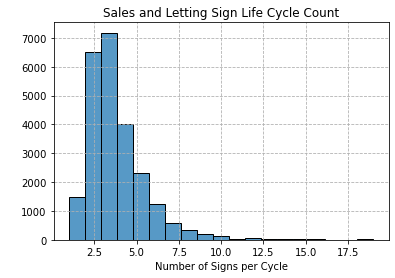

In [26]:
sns.histplot(df_lifecycle['cycle_count'], bins=19)
plt.title('Sales and Letting Sign Life Cycle Count')
plt.xlabel('Number of Signs per Cycle')
plt.ylabel(' ')
plt.grid(True, linestyle='--')

plt.savefig(os.path.join(vizpath,'Qu.9) Sales and Letting Sign Life Cycle Count.png'))

## Qu.9a) Sign life cycle duration categorisation

### categorise cycle_count into the following areas:
     1       Single Sign
     2       Low Cycle
     3 to 4  Expected Cycle
     5 to 6  Good Cycle
     > 6     Extended Cycle

In [27]:
df_lifecycle.loc[df_lifecycle['cycle_count']==1, 'cycle_category']='Single Sign'
df_lifecycle.loc[df_lifecycle['cycle_count']==2, 'cycle_category']='Low Cycle'
df_lifecycle.loc[(df_lifecycle['cycle_count']>2) & (df_lifecycle['cycle_count']<=4), 'cycle_category']='Expected Cycle'
df_lifecycle.loc[(df_lifecycle['cycle_count']>4) & (df_lifecycle['cycle_count']<=6), 'cycle_category']='Good Cycle'
df_lifecycle.loc[df_lifecycle['cycle_count']>6, 'cycle_category']='Extended Cycle'
df_lifecycle.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count,cycle_category
0,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19,78,66,2,Low Cycle
1,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26,2,Low Cycle
2,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122,2,Low Cycle
3,9210,2020-10-13 13:30:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26,2,Low Cycle
4,9210,2021-03-09 11:05:00,2021-03-11 14:06:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122,2,Low Cycle


## Display cycle_category as Pie Chart

### define labels and values

In [33]:
cycle_values = df_lifecycle['cycle_category'].value_counts()
cycle_values

Expected Cycle    11194
Low Cycle          6513
Good Cycle         3573
Single Sign        1469
Extended Cycle     1460
Name: cycle_category, dtype: int64

In [ ]:
cycle_labels = ['Single','Low','Expected','Good','Extended']
cycle_labels

In [37]:
cycle_values = [1469,6513,11194,3573,1460]

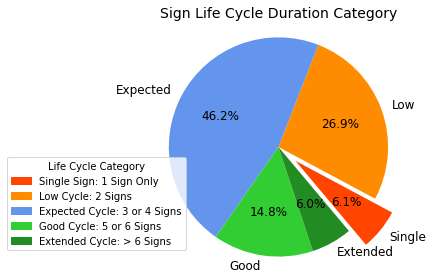

In [43]:
sizes = cycle_values
colors = ['orangered','darkorange','cornflowerblue','limegreen','forestgreen']
explode = (0.2,0,0,0,0)
labels = cycle_labels

texts = plt.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', textprops={'fontsize':12}, startangle=310)
plt.axis('equal')
plt.title('Sign Life Cycle Duration Category', fontsize=14)

cycle_cate1 = mpatches.Patch(color='orangered', label='Single Sign: 1 Sign Only')
cycle_cate2 = mpatches.Patch(color='darkorange', label='Low Cycle: 2 Signs')
cycle_cate3 = mpatches.Patch(color='cornflowerblue', label='Expected Cycle: 3 or 4 Signs')
cycle_cate4 = mpatches.Patch(color='limegreen', label='Good Cycle: 5 or 6 Signs')
cycle_cate5 = mpatches.Patch(color='forestgreen', label='Extended Cycle: > 6 Signs')
plt.legend(title='Life Cycle Category',handles=[cycle_cate1, cycle_cate2, cycle_cate3, cycle_cate4, cycle_cate5], bbox_to_anchor=(0.2, 0.4752))

plt.tight_layout()

plt.savefig(os.path.join(vizpath,'Qu.9a) Sign Life Cycle Duration.png'))

### export to CSV

In [39]:
df_lifecycle.shape

(24209, 47)

In [40]:
df_lifecycle.to_csv(os.path.join(dataset,'stone_signs_portal_v4.0_saleslets_lifecycle_target - 24,209.csv'), index=False)